# Chapter 7 - ex2: Pokemon
### Cho dữ liệu Pokemon.csv => đọc dữ liệu
1. Vẽ scatterplot: Phân loại với các điểm không chồng chéo, so sánh Attack (trục x) & Defense (trục y)
2. Vẽ scatterplot: So sánh Attack (trục x) & Defense (trục y), có sử dụng thêm regression line với lmplot()
3. Vẽ regression plot: thể hiện mối quan hệ tuyến tính giữa Attack (trục x) & Speed(trục y)
4. Vẽ boxplot cho toàn bộ dữ liệu
5. Vẽ boxplot không có các cột 'Total', 'Generation', 'Legendary'
6. Vẽ histogram: biểu diễn tần suất của cột Attack 
7. Vẽ barplot: Nhóm dữ liệu theo Type 1, cho biết mỗi type có mấy mẫu, sắp tăng dần
8. Vẽ pairplot: thể hiện mối quan hệ giữa "Attack", "Defense" theo từng 'Type 1'
9. Vẽ JointGrid: gồm sb.regplot, sb.distplot để thể hiện mối quan hệ giữa "Attack", "Defense"
10. Vẽ JointPlot: thể hiện mối quan hệ giữa 'HP' và 'Speed' dạng hex

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Doc du lieu pokemon.csv, in thong tin, head
df = pd.read_csv('dataset/Pokemon.csv', index_col=0, encoding = 'unicode_escape')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


In [4]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


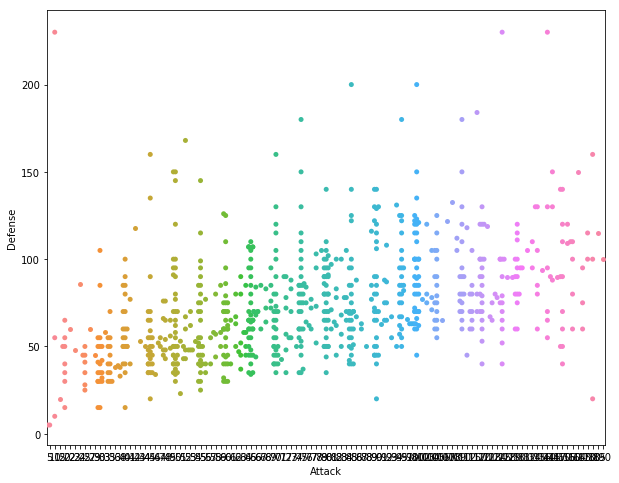

In [5]:
# Construct scatter plot
# Phân loại với các điểm không chồng chéo, so sánh Attack & Defense
plt.figure(figsize=(10,8))
sb.swarmplot(x='Attack', y='Defense', data=df) # x: dữ liệu hiển thị trên trục hoành, y: dữ liệu hiển thị trên trục tung, data: bộ dữ liệu
# Show plot
plt.show()

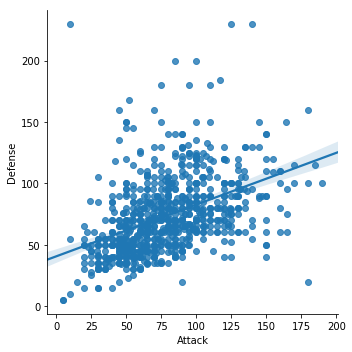

In [6]:
# Scatter plot with fitting and plotting a regression line.
sb.lmplot(x='Attack', y='Defense', data=df)
plt.show()

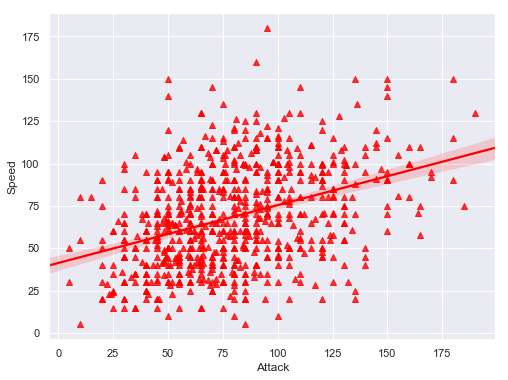

<Figure size 432x288 with 0 Axes>

In [27]:
# Display a regression plot for speed và Attack
plt.figure(figsize=(8,6))
sb.regplot(data=df,
            y='Speed',
            x="Attack",
            marker='^',
            color='red'
          )
plt.show()
plt.clf()

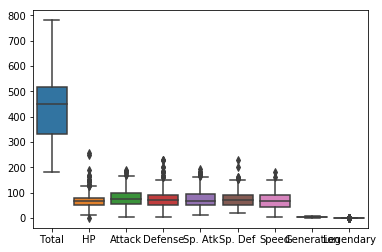

In [7]:
# Vẽ boxplot cho dữ liệu trên
sb.boxplot(data=df)
plt.show()

In [8]:
# Vẽ boxplot nhưng không có các cột 'Total', 'Legendary', 'Generation'
stats_df = df.drop(['Total', 'Legendary', 'Generation'], axis=1)
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80
4,Charmander,Fire,NaN,39,52,43,60,50,65


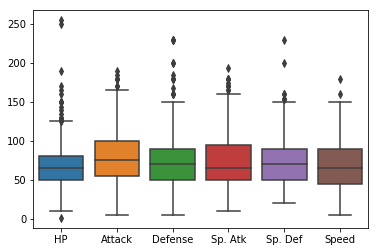

In [9]:
sb.boxplot(data=stats_df)
plt.show()

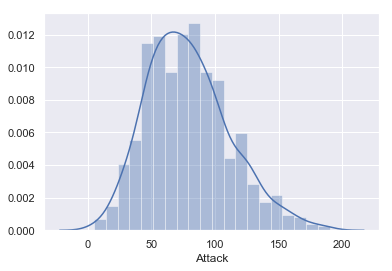

In [10]:
# Hãy biểu diễn tần suất của cột Attack bằng histogram
sb.set()
sb.distplot(df.Attack)
plt.show()

In [41]:
# Nhóm dữ liệu theo Type, cho biết mỗi type có mấy mẫu, vẽ barplot
result = df.groupby('Type 1').HP.count()

In [12]:
type(result)

pandas.core.series.Series

In [39]:
df_result = pd.DataFrame(result)
df_result['label'] = df_result.index
df_result = df_result.sort_values(by=['HP'])
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Flying to Water
Data columns (total 2 columns):
HP       18 non-null int64
label    18 non-null object
dtypes: int64(1), object(1)
memory usage: 432.0+ bytes


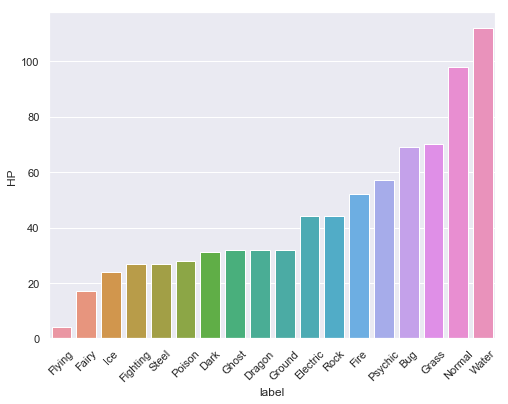

In [42]:
plt.figure(figsize=(8,6))
x = sb.barplot(x = "label", y = "HP", data = df_result)
x.set_xticklabels(df_result.label, rotation=45)
plt.show()

In [15]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80
4,Charmander,Fire,NaN,39,52,43,60,50,65


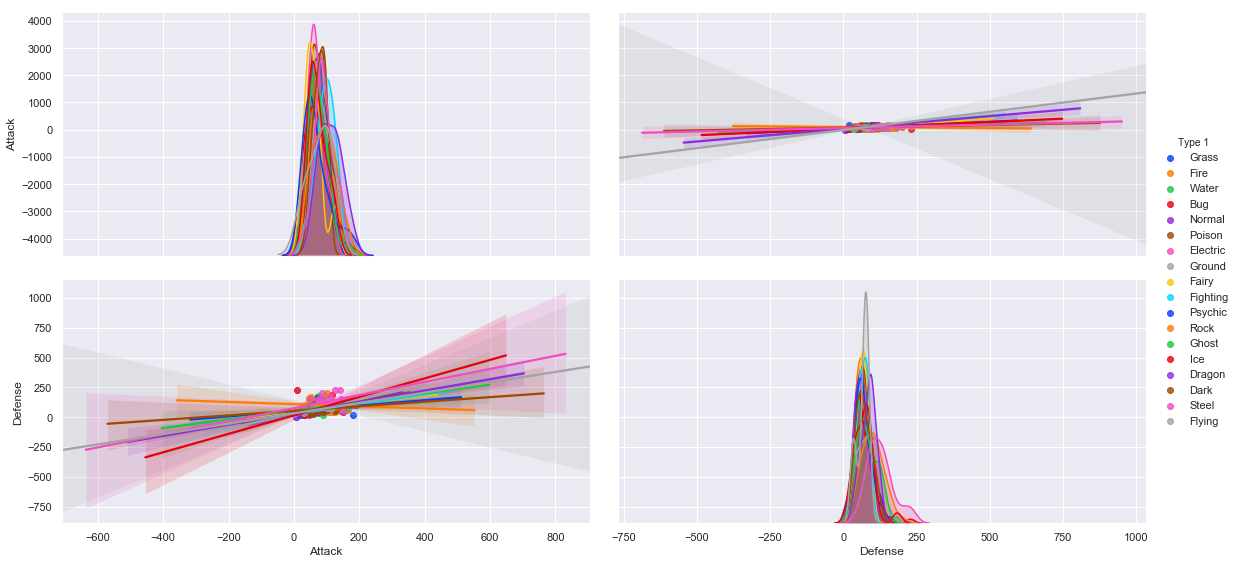

<Figure size 432x288 with 0 Axes>

In [22]:
# plot relationships between insurance_losses and premiums
sb.pairplot(data=stats_df,
             vars=["Attack", "Defense"],
             kind='reg',
             palette='bright',
             diag_kind = 'kde',
             hue='Type 1', 
           height=4,
           aspect=2)

plt.show()
plt.clf()

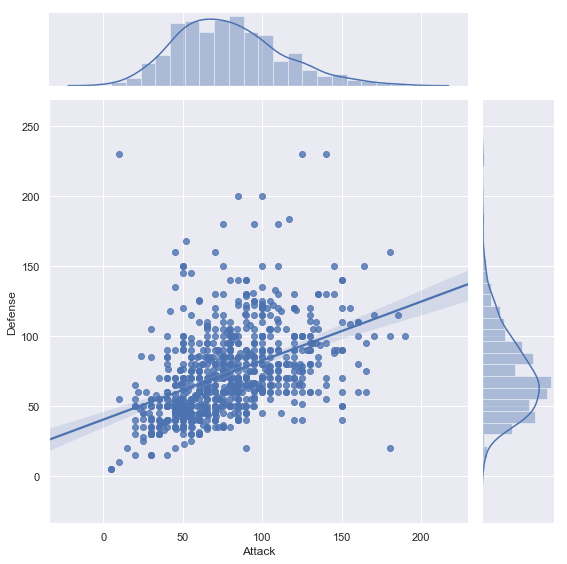

<Figure size 432x288 with 0 Axes>

In [52]:
g = sb.JointGrid(data=df, x="Attack", y="Defense", height=8)  
g.plot(sb.regplot, sb.distplot)
plt.show()
plt.clf()

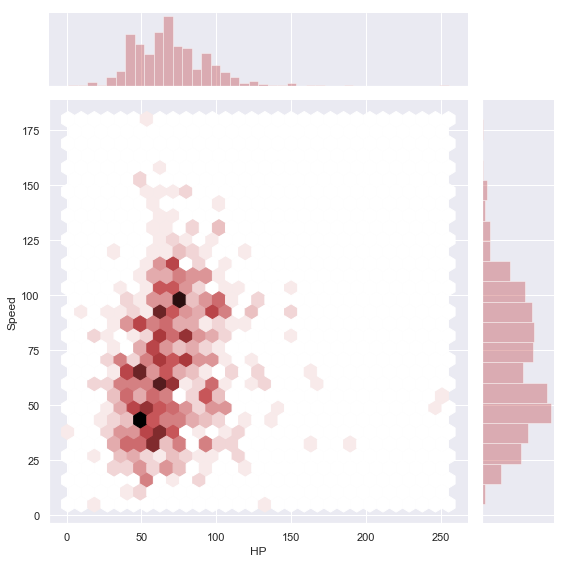

In [51]:
# Joinplot
sb.jointplot(data=df, x="HP", y="Speed", kind='hex', color='r', height=8)
plt.show()